# <center>~ Project 3 ~</center>

# <center> Analyze A/B Test Results </center>

## <center>Analysis report by Audrey Tan</center>


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusions)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == 1').count()[0] / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
(df[(df.group =="treatment") & (df.landing_page !="new_page")].count() + \
df[(df.group =="control") & (df.landing_page !="old_page")] .count())[0]

3893

In [7]:
# same as above
df.query('(group == "treatment" and landing_page == "old_page") \
or (group == "control" and landing_page =="new_page")').count()[0]

3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df.drop(df.query('group == "control" and landing_page == "new_page"').index)\
        .drop(df.query('group == "treatment" and landing_page == "old_page"').index)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2=df2.drop_duplicates('user_id')

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
df2.query('landing_page == "new_page"').count()[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Does the new treatment page lead to more conversions?**

> Given the results from a. through d. above, I do not think there is sufficient evidence to say yes:
>
> * The control group (assigned to old page) has a higher conversion rate (0.1204) than that (0.1188) of the treatement group (assigned to new page), albeit the difference is quite small. 
>
>
> * With the probability of an individual received the new page being 0.5, it is unlikely to yield a difference in conversion based on the likelyhood of one being exposed to the new page more or less often.    


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**The direction is the new page is better, thus ...**

$$H_0: p_{new} \leq p_{old} \Leftrightarrow H_0: p_{new} - p_{old} \leq 0 $$


$$H_1: p_{new} > p_{old} \Leftrightarrow H_1: p_{new} - p_{old} > 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new = df2.query('group == "treatment"').count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2.query('group == "control"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.binomial(n_new, p_new)
new_page_converted

17429

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.binomial(n_old, p_old)
old_page_converted

17429

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted/n_new - old_page_converted/n_old

-2.9722926891101453e-05

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
new_page_converted = np.random.binomial(n_new, p_new, 10000) / n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000) / n_old
p_diffs = new_page_converted - old_page_converted

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [27]:
obs_pnew = df2.query('group == "treatment"').converted.mean()
obs_pold = df2.query('group == "control"').converted.mean()

obs_diff = obs_pnew - obs_pold

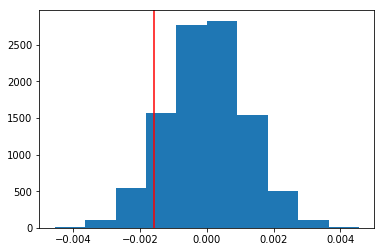

In [28]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
pval = (p_diffs > obs_diff).mean()
pval

0.9053

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**P-value and what it means in terms of if there is a difference between the new and old pages**
>
> * The value from part _j_ represents the P-value. It is the probability of getting the statistic observed in our data or one more extreme in favor of $H_1$ (alternative hypothesis) if $H_0$ (null hypothesis) is **true**.
>
>
> * Given the P-value here is greater than $\alpha = 0.05$ (Type I error rate), there is no basis to reject the null $H_0$.
>
> 
> * The P-value of 0.9061 (~ 90%) suggests a high confidence that the old page conversion rates are at least the same or better than that of the new page.
>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2.query('landing_page =="old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page =="new_page" and converted == 1').shape[0]
n_old = df2.query('landing_page =="old_page"').shape[0]
n_new = df2.query('landing_page =="new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
zscore, pval = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative= 'larger')
zscore, pval

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**What do the z-score and p-value mean for the conversion rates of the new and old page, compared with the findings in parts j. and k.?**
> * The P-value of 0.9051 here closely mirrors the 0.9061 in part **j**. It is still greater than $\alpha = 0.05$ (Type I error rate) giving us no reason to reject $H_0$. It again reinforces a high confidence the old page conversion rates are at least the same or better than that of the new page.    
>
>
> * The z-score is the number of standard deviations from the difference between our new and old converted means, i.e. the red line **obs_diff** in the **p_diffs** histogram in part **i.**. So the z-score here is -1.3 standard deviations below **obs_diff**. In fact, it has a 0.9049 (~90%) rate in the [Left Z-Table](https://www.statisticshowto.datasciencecentral.com/tables/z-table/), meaning it is roughly 90% below our **obs_diff** mean. Likwise, giving us no reason to rejcet the null $H_0$.    
>
>
> * In a nutshell, the results here agree with the findings in parts **j.** and **k.**.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**The appropriate regression operation to perform:**
> * Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [33]:
df2['intercept'] = 1
df2[['treatment','control']] = pd.get_dummies(df2['group'])
df2 = df2.rename(columns={'treatment': 'ab_page'})
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,control
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [34]:
import statsmodels.api as sm
model = sm.Logit(endog = df2['converted'], exog = df2[['intercept', 'ab_page']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 31 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        14:49:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.311      0.190      -0.007       0.037


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**P-value associated with ab_page and why does it differ from the value found in Part II?**
> * The P-value is 0.19, which is larger than $\alpha = 0.05$ (Type I error rate), thus there is no basis to reject the null $H_0$. Here the predictor variable ab_page did not significantly contribute to predicting the conversion rate either statistically or practically.     
>
>
> * It differs from the value found in **Part II** because in our **Logistic Regression** testing, our null and alternative hypotheses are:
> $$ H_0: \beta_{ab\_test} = 0 $$
> $$ H_1: \beta_{ab\_test} \neq 0 $$
> versus in **Part II**: 
> $$H_0: p_{new} \leq p_{old} \Leftrightarrow H_0: p_{new} - p_{old} \leq 0 $$
> $$H_1: p_{new} > p_{old} \Leftrightarrow H_1: p_{new} - p_{old} > 0 $$
>
>
> * Our **Logistic Regression** test here is a **two-tailed** test compared to the **one-tailed** test in **Part II**. The former (aka non-directional hypothesis) predicts an **OPEN** outcome where the results can go in 2 directions. Whereas, the latter (aks directional hypothesis) predicts the actual **DIRECTION** the findings will go.
>
>
> * In A/B testing, typically we want to take one action (e.g. to deploy or not deploy a new page) if we find a statistically significant difference in a particular direction, and **another** action in the other direction. A **one-tailed** test enables us to accomplish that goal. Whereas a **two-tailed** test implies we want to take the **same** action if we find a statistically significant difference in any direction, which is hardly the case in practice.
>
>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Considering other factors that might influence the conversion rates**
> * It is a good idea to consider other factors that might influence an individual to convert, **providing** the factors for inclusion are linearly independent.  
>
>
> * For example, we can use timestamp in our dataset to create a new factor of **test duration**, which can influence individual conversion rates. 
>
>
> * Alternatively, we can convert timestamp to represent **timing of when conversions occur**, for example, morning, middle of day, afternoon, early evening, late night, etc. This factor can provide clues on peak conversion rates during certain time of a day. 
>
> 
> * However, when adding new factors, we need to watch out if the factors are **linearly independent**, to avoid introducing **Multicollinearity** errors to our model. For example, the predictor variables landing_page, ab_page and group in our dataset represent  experiment conditions of individuals from control or treatment group, so they are collinear and not suitable for inclusion together.   
>
>
> * Another thing to watch for is **Outlier** problem. These errors occur when there are points that lie far away from the regular trends of our data. This can happen when we have data collected from multiple data sources. 
>
>
> * In short, when considering adding a new predictor variable to our model, it is necessary to make sure the inclusion will help rather than hurt our model's accuracy.
> 
>
 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
df2=df2.drop('control', axis=1)
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0


In [37]:
df_new[['CA', 'UK', 'US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
# Fit Your Linear Model And Obtain the Results
model = sm.Logit(endog = df_new['converted'], exog = df_new[['intercept', 'ab_page','CA','UK']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [39]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 31 Mar 2019   Pseudo R-squ.:               2.323e-05
Time:                        14:49:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0042      0.009   -224.560      0.000      -2.022      -1.987
ab_page        0.0149      0.011      1.307      0.191      -0.007       0.037
CA            -0.0408      0.027     -1.516      0.1

**Does interaction between page and country have significant effects on conversion?** 
> * With the large P-values of 0.130 and 0.457 for users from CA and UK respectively, it does not seems the new categorical predictor variable country has any statistical significance on conversion. 
>

<a id='conclusions'></a>
## Conclusion

> The results from Part I (probabilistic reasoning), Part II (hypothesis testing) and Part III (logistic regression) consistently suggest: 
> 
> 
> * The new treatment page did not lead to increase in conversion rate. Nor did geographic location make a difference.
>
>
> * Although the different approaches in computing the P-value in Part II and Part II resulted in different p-values, the conclusion from both approaches is consistent: the large P-values of 0.906 and 0.190 from Part II and Part III respectively implies there is no basis to reject the null hypothesis $H_0$. 
>
>
> * Adding new predictor variables to our model may help our model's accuracy providing the predictor variables are **linearly independent** and we have ensured the additions won't introduce problems like **Multicollinearity** or **Outlier**. 
>
>
> * The results carry neither statistical nor practical significance to support the company launching the new page.  




# References

### Udacity Practical Statistics 
[Lesson 12 : Hypothesis Testing](https://youtu.be/nQFchD4XPPs)

[Lesson 13 : Case Study: A/B Tests](https://youtu.be/qmGjRpMVBz8)

[Lesson 14 : Regression](https://youtu.be/DzMi27LI5l4)

[Lesson 15 : Multiple Linear Regression](https://youtu.be/b26v8HK-8-o)

[Lesson 16 : Logistic Regression](https://youtu.be/P_f2RjjnPEg)


### Miscellaneous Online References 
[Numpy Binomial Sampling](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html)

[Understanding Hypothesis Tests: Significance Levels (Alpha) and P values in Statistics](http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-hypothesis-tests-significance-levels-alpha-and-p-values-in-statistics)

[One-tailed vs Two-tailed Tests of Significance in A/B Testing | Analytics-Toolkit.com](http://blog.analytics-toolkit.com/2017/one-tailed-two-tailed-tests-significance-ab-testing/)

[What is a p-value](https://rebeccaebarnes.github.io/2018/05/01/what-is-a-p-value)

[Z-Score: Definition, Formula and Calculation](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/)

[StatsModels Linear Regression](http://www.statsmodels.org/dev/regression.html)